In [185]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

**columns information**
1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina[very high correlation with heart attack]; 2 = atypical angina; 3 = non-anginal pain[not related to heart disease]; 0 = asymptomatic[Person does not have heart disease])

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy[the thickening of the heart muscle, usually in response to increased workload])[this basically checks about the heart electrical signals, how it is performing]

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)[The term "exang" in a medical context, especially in relation to cardiac assessments like a stress test, refers to whether a person experiences angina (chest pain) induced by exercise.]

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)


In [186]:
data = pd.read_csv("C:/Users/GKUMAR83/Downloads/machine_learning_project/machine_learning/Projects/heart_attack_analysis_project/heart.csv")

In [187]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## checking for missing values

In [188]:
#this code basically tells, In all the columns we don't have any null values
data.isna().sum()
#to display it in more sophisticated format.
isnull_number = []
for columns in data.columns:
    x = data[columns].isna().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index= data.columns, columns=["total_null_values"])


,total_null_values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


<Axes: >

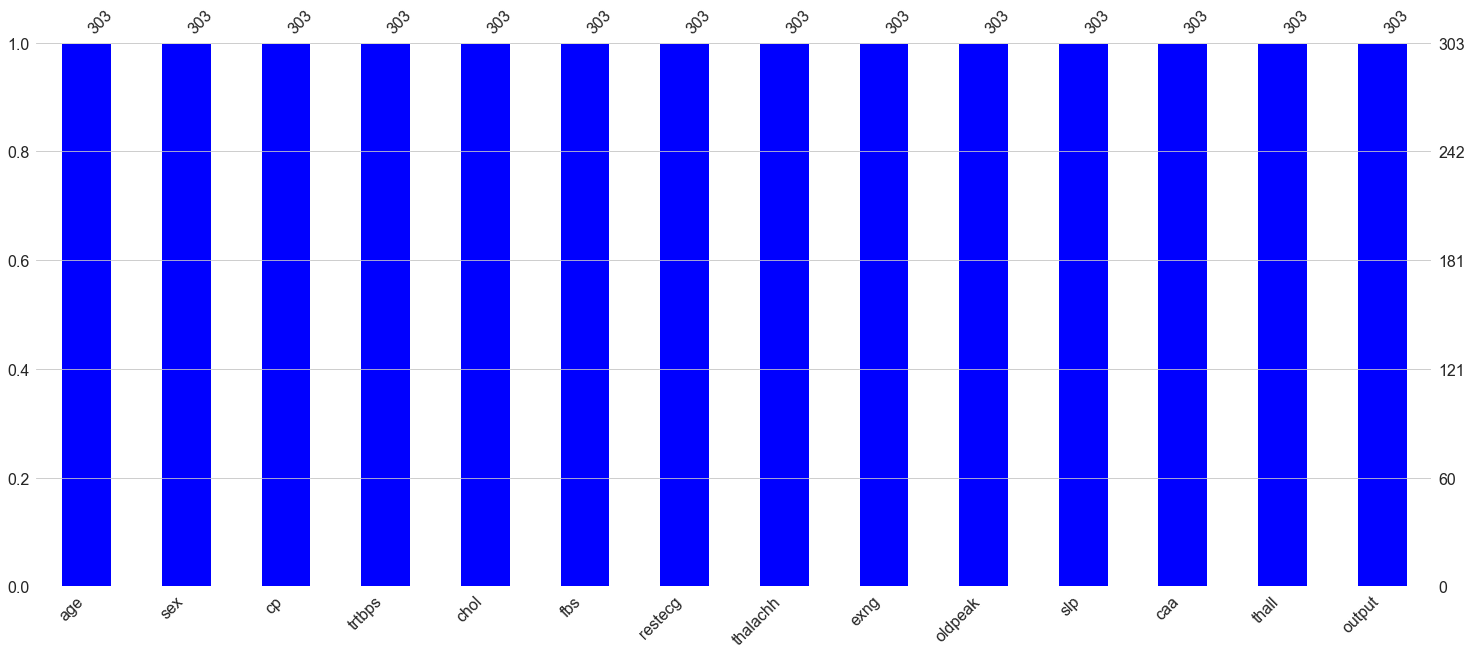

In [189]:
import missingno
missingno.bar(data, color = 'b')

## checking for unique values
**so i want to creata a dataframe that can show the unique values from all the columns**


In [190]:
unique_values = []
for i in data.columns:
    unique_values.append(data[i].nunique())
pd.DataFrame(unique_values, index = data.columns, columns=['no_of_unique_values'])


,no_of_unique_values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


## understanding the skewness of data
**whether a column data is left skewed or right skewed**

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

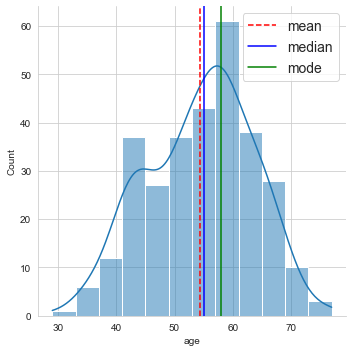

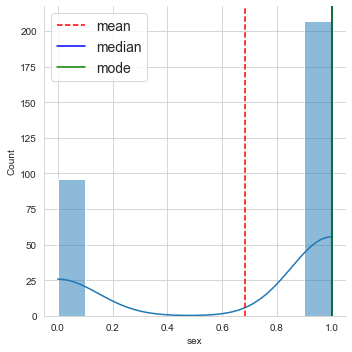

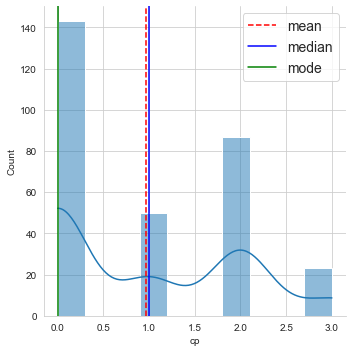

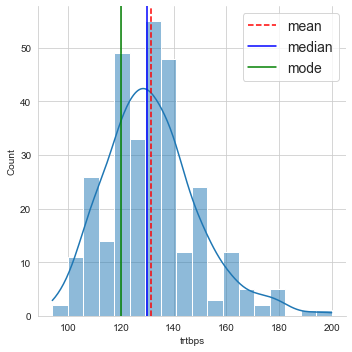

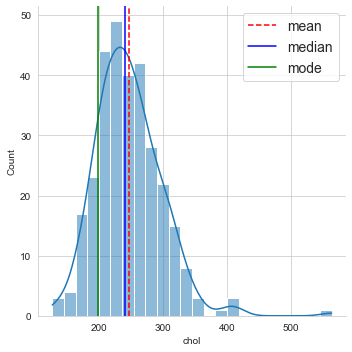

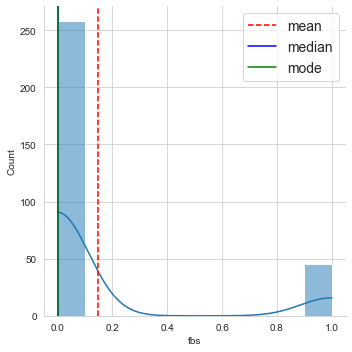

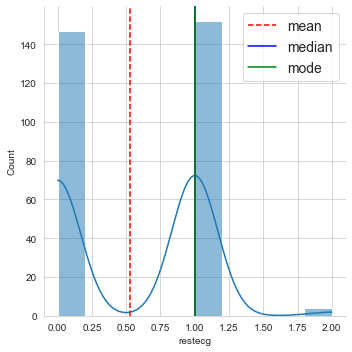

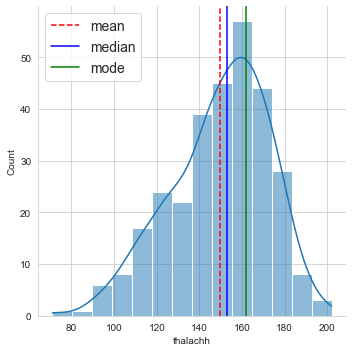

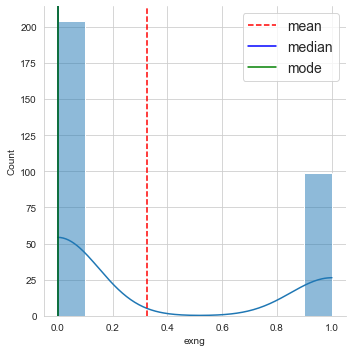

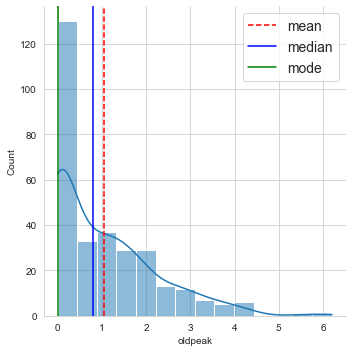

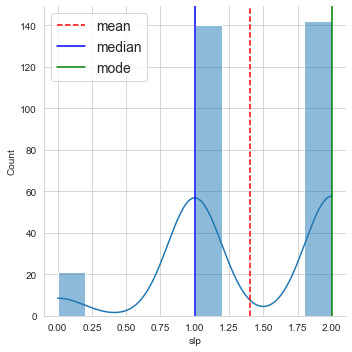

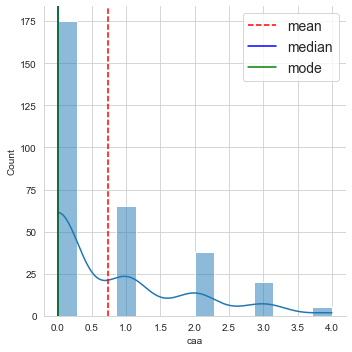

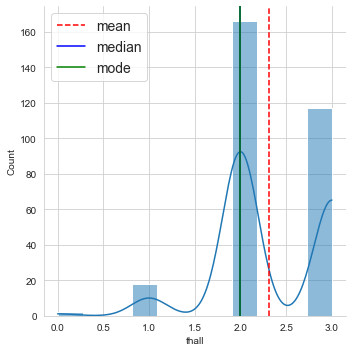

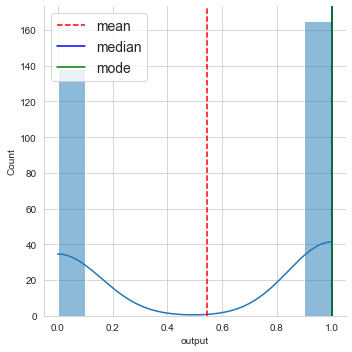

In [192]:

for column_name in data.columns:
    sns.displot(data[column_name], kde = True)
    plt.axvline(x = data[column_name].mean(), color = 'r', label="mean", linestyle="--")
    plt.axvline(x = data[column_name].median(), color = 'b', label="median")
    plt.axvline(x = data[column_name].mode()[0], color = 'g', label="mode")
    plt.legend(fontsize=14)
    plt.show()

In [193]:
#try to print the unque_values from each columns
categorical_columns = {}
for columns in data.columns:
    if len(data[columns].unique()) < 10:
        categorical_columns[columns] = data[columns].value_counts().to_dict()
    # print(data[columns].unique())

In [194]:
print(categorical_columns["sex"].values())

dict_values([207, 96])


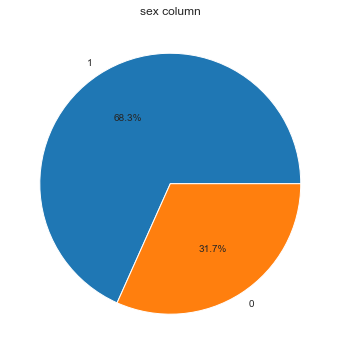

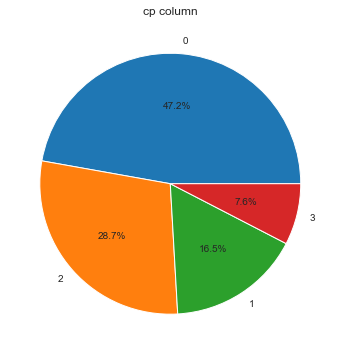

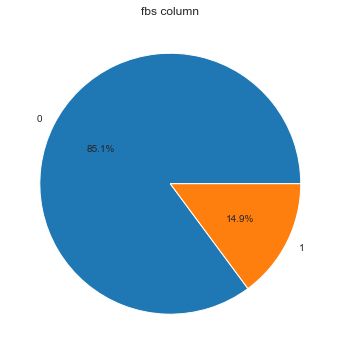

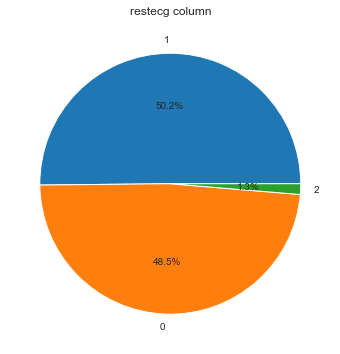

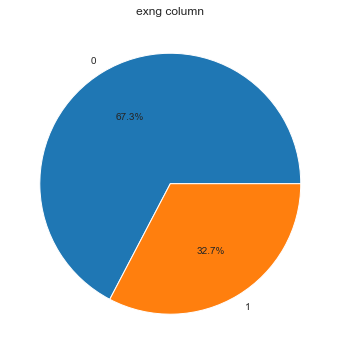

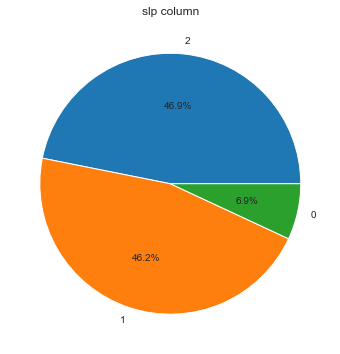

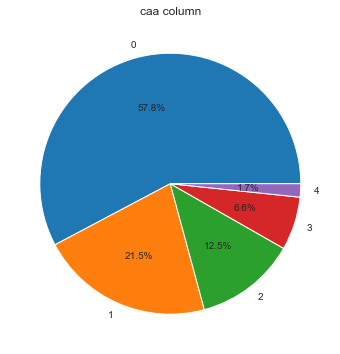

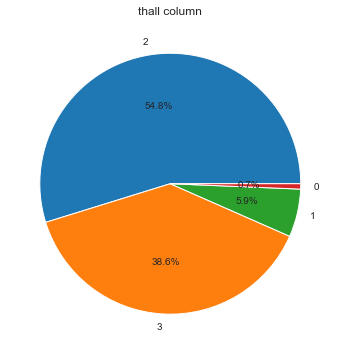

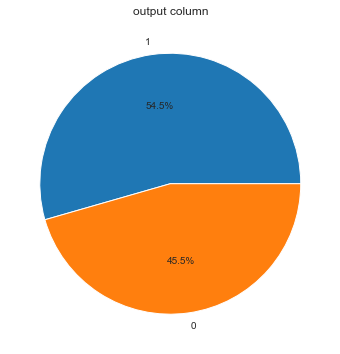

In [195]:
#creating pie chart for categorical columns
for columns in categorical_columns.keys():
    sns.set_style("whitegrid") # Set style for chart
    plt.figure(figsize=(6,6)) # Set figure size
    plt.pie(categorical_columns[columns].values(), labels=categorical_columns[columns].keys(),autopct='%1.1f%%') # Create pie chart
    plt.title(columns +" column")
    plt.show() # Show chart


## Bi-Variate analysis


In [196]:
numerical_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak','output']

In [197]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [198]:
title_font = {"family":'arial', "color":"darkred", "weight":'bold', "size":15}
axis_font = {"family":'arial', "color":"darkblue", "weight":'bold', "size":13}

C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


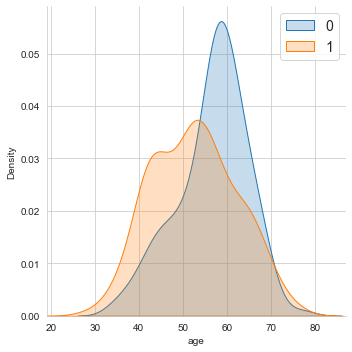

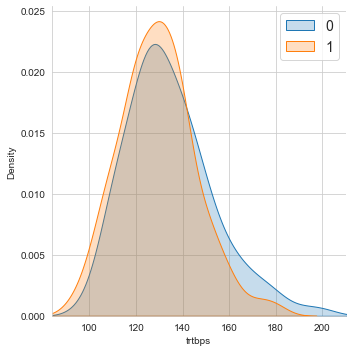

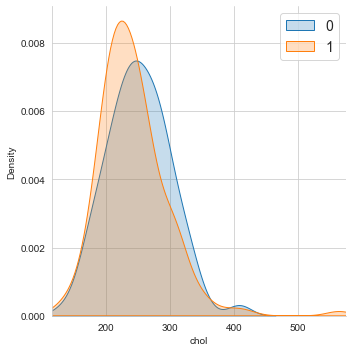

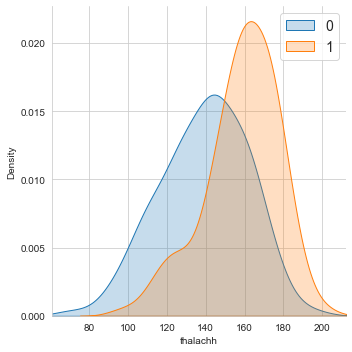

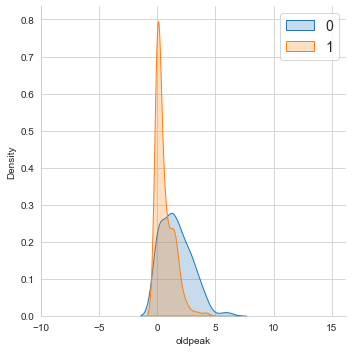

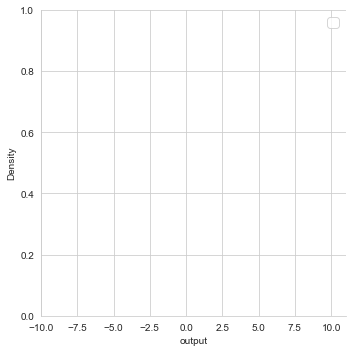

In [199]:
numerical_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak','output']
for columns in numerical_columns:
    graph = sns.FacetGrid(data[numerical_columns], hue = 'output', height=5, xlim=((data[columns].min() - 10), (data[columns].max() + 10)))
    graph.map(sns.kdeplot, columns, fill='True')
    plt.legend(fontsize=14)

# bi-variate of categorical columns

In [200]:
df = data

C:\Users\GKUMAR83\AppData\Local\Temp\ipykernel_19952\302347387.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')


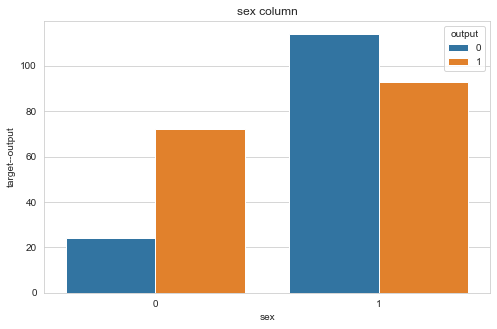

C:\Users\GKUMAR83\AppData\Local\Temp\ipykernel_19952\302347387.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')


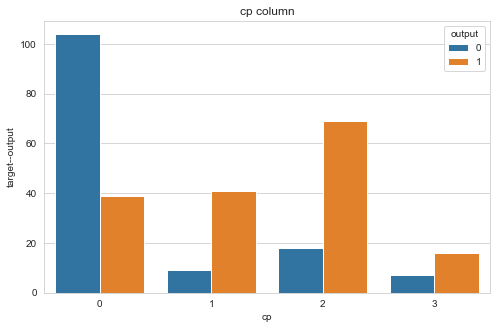

C:\Users\GKUMAR83\AppData\Local\Temp\ipykernel_19952\302347387.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')


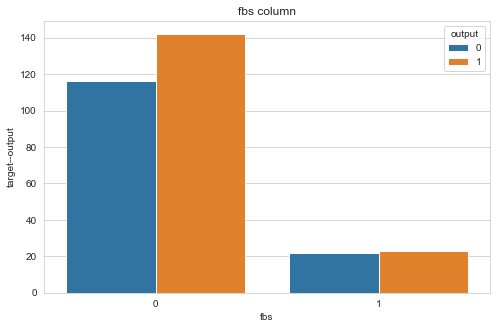

C:\Users\GKUMAR83\AppData\Local\Temp\ipykernel_19952\302347387.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')


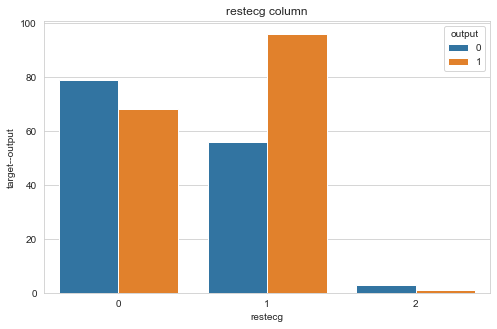

C:\Users\GKUMAR83\AppData\Local\Temp\ipykernel_19952\302347387.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')


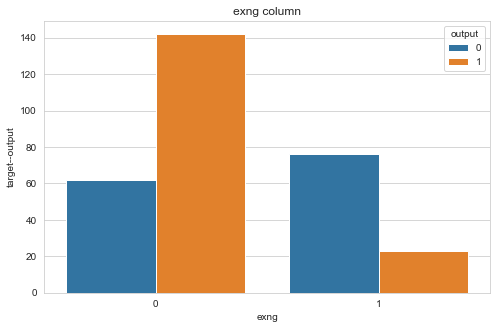

C:\Users\GKUMAR83\AppData\Local\Temp\ipykernel_19952\302347387.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')


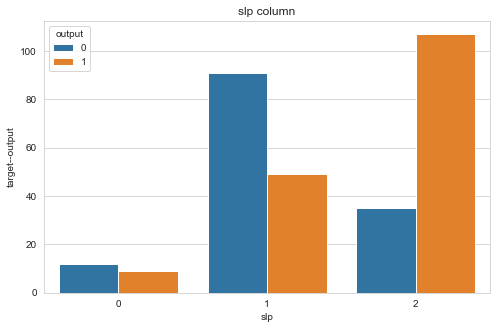

C:\Users\GKUMAR83\AppData\Local\Temp\ipykernel_19952\302347387.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')


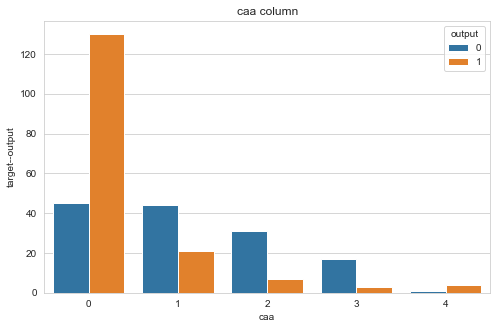

C:\Users\GKUMAR83\AppData\Local\Temp\ipykernel_19952\302347387.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')


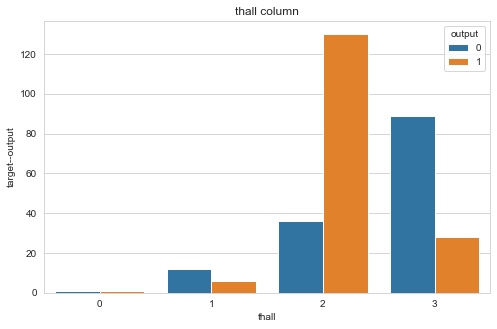

C:\Users\GKUMAR83\AppData\Local\Temp\ipykernel_19952\302347387.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')


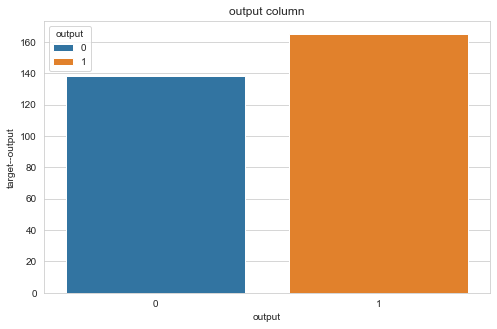

In [201]:
#creating pie chart for categorical columns
for columns in categorical_columns.keys():
    plt.figure(figsize=(8, 5))
    sns.countplot(data  = data[categorical_columns],x = columns, hue = 'output')
    # sns.set_style("whitegrid") # Set style for chart
    # plt.figure(figsize=(6,6)) # Set figure size
    # plt.pie(categorical_columns[columns].values(), labels=categorical_columns[columns].keys(),autopct='%1.1f%%') # Create pie chart
    plt.title(columns +" column")
    plt.ylabel("target--output")
    plt.show() # Show chart


##feature scaling using Robust scaler method

In [202]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [203]:
numerical_columns.remove('output')
scaled_data = robust_scaler.fit_transform(data[numerical_columns])
df_sclaed = pd.DataFrame(scaled_data, columns = numerical_columns)
df_sclaed
df_new = pd.concat([df_sclaed, data.loc[:, 'output']], axis=1)
df_melt = pd.melt(df_new, id_vars="output",var_name="tests_column", value_name="tests_output_column")
df_melt

,output,tests_column,tests_output_column
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

<Axes: xlabel='tests_column', ylabel='tests_output_column'>

C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

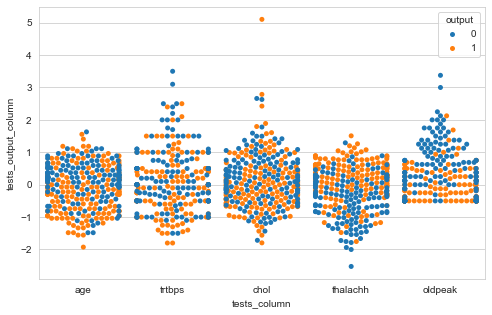

In [207]:
plt.figure(figsize=(8, 5))
sns.swarmplot(data=df_melt, x='tests_column', y='tests_output_column', hue='output',legend='auto')

## analysis of numerical columna and categorical columns[using swarmplot]

In [209]:
for i in categorical_columns:
    print(i)
    df_new = pd.concat([df_sclaed, data.loc[:, i]], axis=1)
    df_melt = pd.melt(df_new, id_vars=i,var_name="tests_column", value_name="tests_output_column")
    # df_melt
    plt.figure(figsize=(8, 5))
    sns.swarmplot(data=df_melt, x='tests_column', y='tests_output_column', hue=i,legend='auto')
    

sex


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

cp


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

fbs


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

restecg


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

exng


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

slp


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

caa


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

thall


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8

output


C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR83\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\GKUMAR8